**CSI 4506 Introduction à l’intelligence artificielle** <br/>
*Devoir 1 : Santé des animaux de compagnie extraterrestres, préparation des données*

# Identification

Nom : Ruth Esther Apata<br/>
Numéro d’étudiant :300144673

## 1. Données

Le jeu de données pour le Devoir 1 se trouve ici :

- [github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1](https://github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1)

Dans votre notebook, vous pouvez accéder et lire les données directement depuis ce dépôt GitHub.

- [alien_pet_health.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv)

## 2. Tâches

1. **Charger le jeu de données**

- Lire le fichier CSV depuis l'URL GitHub fournie.
- Afficher la dimension des données (*shape*), ainsi que les cinq premières lignes.

In [170]:
#imports
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [171]:
# Cellule de code
file_path = "https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv"
df = pd.read_csv(file_path)


In [172]:
(N,D)=(df.shape)
print(N,D)
print('Il y a ',N,'lignes et ',D,'colonnes\n\n')

print('Voici la liste des atributs \n\n ')
for col in df.columns:
    print(col)

print('\n\nLes 5 premières lignes')
df.head()


5000 14
Il y a  5000 lignes et  14 colonnes


Voici la liste des atributs 

 
record_id
thermoreg_reading
enzyme_activity_index
dual_lobe_signal
stress_variability
habitat_zone
activity_score
fasting_flag
health_outcome
station_code
ingest_marker
calibration_tag
diagnostic_noise
thermoreg_reading_fahrenheit


Les 5 premières lignes


,record_id,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,ingest_marker,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,P22042111,52.6,97.0,3.6,-3.5,c2,2.0,0.0,1,Z-WHH,1.0,A,0.482088,34.742454
1,P21571318,41.8,105.0,3.4,10.5,c1,2.0,0.0,0,z-eat,1.0,A,NaN,NaN
2,P81737259,56.2,126.0,5.5,9.6,c2,5.0,0.0,0,Z-IPF,1.0,A,-0.747352,38.754061
3,P54935007,57.7,106.0,-4.1,-4.0,c1,4.0,0.0,1,Z-FKO,1.0,A,0.570478,40.465082
4,P63102956,34.5,73.0,2.3,0.3,c4,5.0,1.0,1,Z-SVY,1.0,A,-0.310844,NaN


2. **Valeurs manquantes**

- Examiner le jeu de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que ‘?’, des chaînes vides ou d'autres substituts.
- Lister l'attribut ou les attributs avec des valeurs manquantes.
- Décrire la méthodologie utilisée pour cette analyse, et fournir le code correspondant, le cas échéant.
- Convertir les jetons manquants (par exemple, chaînes vides, `n/a`, `?`) en `NaN`.
- Forcer les colonnes numériques ou analogues à être numériques (erreurs→`NaN`).

Après cette étape, chaque attribut sera peuplé de valeurs spécifiques ou de `NaN`.

In [173]:
# Cellule de code
print(df.isnull().sum())
print(df.isnull().sum().sum())

record_id                       180
thermoreg_reading               299
enzyme_activity_index           257
dual_lobe_signal                244
stress_variability              291
habitat_zone                    152
activity_score                  229
fasting_flag                    236
health_outcome                    0
station_code                    148
ingest_marker                   252
calibration_tag                 161
diagnostic_noise                262
thermoreg_reading_fahrenheit    949
dtype: int64
3660


In [174]:
print("Liste des 10 éléments les moins fréquents de chaque attribut pour voir un peu quelles seraient les valeurs aberrantes \ncomme des chaînes de caractères qui devraient pas être là")
for col in df.columns:
    print(df[col].value_counts(dropna=False).tail(10))




Liste des 10 éléments les moins fréquents de chaque attribut pour voir un peu quelles seraient les valeurs aberrantes 
comme des chaînes de caractères qui devraient pas être là
record_id
P26115097    1
P95635034    1
P42957842    1
P40683150    1
P18126382    1
P25380513    1
P42813209    1
p35006706    1
P63948712    1
P59297768    1
Name: count, dtype: int64
thermoreg_reading
-30.018674     1
 67.900000     1
 27.300000     1
 67.400000     1
 28.500000     1
 76.300000     1
 29.800000     1
 132.118674    1
-36.718674     1
-40.718674     1
Name: count, dtype: int64
enzyme_activity_index
183.000000    1
182.935043    1
326.990097    1
233.321199    1
349.993968    1
192.000000    1
325.732016    1
265.352287    1
298.423934    1
11.000000     1
Name: count, dtype: int64
dual_lobe_signal
 8.9    1
-6.1    1
-5.3    1
-6.2    1
 8.6    1
-5.2    1
-5.1    1
-5.9    1
 8.5    1
-5.8    1
Name: count, dtype: int64
stress_variability
 18.7    1
 13.3    1
 12.0    1
 13.2    1
 15.2    

On observe ici les chaines de caractère ["N/a", "?"...]

On va ajouter ceci à d'autres chaînes qui pourraient ne pas être apparues ici

In [175]:
print("Contenu à nettoyer")

contenu_problematique=['?', '','n/a'," ",'N/a',"n/A"]

def compte(quoi):
  total=0
  compte_null =0
  for col in df.columns:
      print(col)
      total_col=0
      for val in quoi:
          count = (df[col] == val).sum()
          print(f"  {val!r} : {count}")
          total_col+= count
      nan_values = df[col].isnull().sum()
      print(f"  'NaN' : {nan_values}")
      print(f"{col} un total de  : {nan_values+total_col} valeurs manquantes \n")
      total+=total_col
      compte_null+=nan_values
  print(f"Total de {compte_null} valeurs NULL et {total} valeurs corrompues")



compte(contenu_problematique)




Contenu à nettoyer
record_id
  '?' : 103
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 4
  'n/A' : 0
  'NaN' : 180
record_id un total de  : 287 valeurs manquantes 

thermoreg_reading
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 299
thermoreg_reading un total de  : 299 valeurs manquantes 

enzyme_activity_index
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 257
enzyme_activity_index un total de  : 257 valeurs manquantes 

dual_lobe_signal
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 244
dual_lobe_signal un total de  : 244 valeurs manquantes 

stress_variability
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 291
stress_variability un total de  : 291 valeurs manquantes 

habitat_zone
  '?' : 102
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 3
  'n/A' : 0
  'NaN' : 152
habitat_zone un total de  : 257 valeurs manquantes 

activity_score
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' :

In [176]:
df.replace(contenu_problematique, np.nan, inplace=True)
print("Contenu corrompu remplacé par NaN")



Contenu corrompu remplacé par NaN


In [177]:
print("\nAprès nettoyage")
compte(contenu_problematique)


Après nettoyage
record_id
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 287
record_id un total de  : 287 valeurs manquantes 

thermoreg_reading
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 299
thermoreg_reading un total de  : 299 valeurs manquantes 

enzyme_activity_index
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 257
enzyme_activity_index un total de  : 257 valeurs manquantes 

dual_lobe_signal
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 244
dual_lobe_signal un total de  : 244 valeurs manquantes 

stress_variability
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 291
stress_variability un total de  : 291 valeurs manquantes 

habitat_zone
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  'n/A' : 0
  'NaN' : 257
habitat_zone un total de  : 257 valeurs manquantes 

activity_score
  '?' : 0
  '' : 0
  'n/a' : 0
  ' ' : 0
  'N/a' : 0
  '

On va forcer les colonnes numériques ou analogues à être numériques (erreurs→NaN).

In [178]:
df.head(10)


,record_id,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,ingest_marker,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,P22042111,52.6,97.0,3.6,-3.5,c2,2.0,0.0,1,Z-WHH,1.0,A,0.482088,34.742454
1,P21571318,41.8,105.0,3.4,10.5,c1,2.0,0.0,0,z-eat,1.0,A,NaN,NaN
2,P81737259,56.2,126.0,5.5,9.6,c2,5.0,0.0,0,Z-IPF,1.0,A,-0.747352,38.754061
3,P54935007,57.7,106.0,-4.1,-4.0,c1,4.0,0.0,1,Z-FKO,1.0,A,0.570478,40.465082
4,P63102956,34.5,73.0,2.3,0.3,c4,5.0,1.0,1,Z-SVY,1.0,A,-0.310844,NaN
5,P64134852,39.7,69.0,-1.2,5.1,c4,2.0,1.0,0,Z-WAH,1.0,A,1.416906,20.280384
6,P74095503,51.2,94.0,-1.7,3.8,c2,3.0,1.0,1,Z-YDK,1.0,A,-1.347186,33.150564
7,P12582010,47.6,113.0,0.4,-4.4,c5,3.0,1.0,1,Z-SFR,1.0,A,-0.554478,NaN
8,P53695296,50.0,80.0,-2.6,NaN,c3,NaN,1.0,0,Z-DCX,1.0,A,-0.820194,31.848790
9,P23313347,43.3,71.0,0.4,-2.0,c4,3.0,1.0,0,Z-DJJ,1.0,A,0.280675,24.322605


Les colonnes qui doivent être numériques sont:<br/>
thermoreg_reading               <br/>
enzyme_activity_index           <br/>
dual_lobe_signal                <br/>
stress_variability              <br/>
activity_score                  <br/>
fasting_flag                    <br/>
health_outcome                  <br/>
ingest_marker                   <br/>
diagnostic_noise                <br/>
thermoreg_reading_fahrenheit    <br/>



In [179]:
num_col = ['health_outcome', 'thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'activity_score', 'fasting_flag', 'ingest_marker', 'diagnostic_noise', 'thermoreg_reading_fahrenheit']
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"Après numérisation: {df.dtypes}")

print(df.isnull().sum().sum())

Après numérisation: record_id                        object
thermoreg_reading               float64
enzyme_activity_index           float64
dual_lobe_signal                float64
stress_variability              float64
habitat_zone                     object
activity_score                  float64
fasting_flag                    float64
health_outcome                    int64
station_code                     object
ingest_marker                   float64
calibration_tag                  object
diagnostic_noise                float64
thermoreg_reading_fahrenheit    float64
dtype: object
4015


On voit que le nombre de valeurs NaN est resté le même donc pd.to_numeric n'a pas rencontré des valeurs non convertissables en nombre.

In [180]:
df.head()

,record_id,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,ingest_marker,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,P22042111,52.6,97.0,3.6,-3.5,c2,2.0,0.0,1,Z-WHH,1.0,A,0.482088,34.742454
1,P21571318,41.8,105.0,3.4,10.5,c1,2.0,0.0,0,z-eat,1.0,A,NaN,NaN
2,P81737259,56.2,126.0,5.5,9.6,c2,5.0,0.0,0,Z-IPF,1.0,A,-0.747352,38.754061
3,P54935007,57.7,106.0,-4.1,-4.0,c1,4.0,0.0,1,Z-FKO,1.0,A,0.570478,40.465082
4,P63102956,34.5,73.0,2.3,0.3,c4,5.0,1.0,1,Z-SVY,1.0,A,-0.310844,NaN


3. **Attributs catégoriels**

- Analyser le jeu de données pour détecter d'éventuels problèmes avec les attributs catégoriels. Par exemple, vous pourriez rencontrer des cas où la même catégorie est représentée de manière incohérente en utilisant à la fois des lettres minuscules et majuscules, ou où des espaces superflus sont inclus.
- Décrire la méthodologie utilisée pour cette analyse, et fournir le code correspondant, le cas échéant.
- Normaliser les valeurs des attributs catégoriels.

In [181]:
# Cellule de code
cat_col =[col for col in df.columns if col not in num_col]
print(f"Voici les attributs catégoriels: {cat_col}")

Voici les attributs catégoriels: ['record_id', 'habitat_zone', 'station_code', 'calibration_tag']


In [182]:
for col in cat_col:
    print(df[col].value_counts(dropna=False),"\n")

record_id
NaN          287
P53695296      1
P23313347      1
P94810628      1
P99508614      1
            ... 
P25380513      1
P42813209      1
p35006706      1
P63948712      1
P12582010      1
Name: count, Length: 4714, dtype: int64 

habitat_zone
c1     1475
c2     1072
c3      885
c4      492
c5      348
NaN     257
C1      170
C2      118
C3       89
C4       57
C5       37
Name: count, dtype: int64 

station_code
NaN      217
Z-QXD      4
Z-ENI      3
Z-PGV      3
Z-FJA      3
        ... 
Z-WVP      1
Z-NKQ      1
Z-LAW      1
Z-UCX      1
Z-FPM      1
Name: count, Length: 4273, dtype: int64 

calibration_tag
A      4461
NaN     235
a       204
B        90
b        10
Name: count, dtype: int64 



On remarque que dans les attributs catégoriels, certaines sous-classes sont majuscules ou minuscules ce qui est interprété comme des sous-catégories différentes. On va donc les mettre en majuscules pour harmoniser le tout.

In [183]:
for col in cat_col:
  df[col] = df[col].str.upper()
  print(df[col].value_counts(dropna=False),"\n")

record_id
NaN          287
P53695296      1
P23313347      1
P94810628      1
P99508614      1
            ... 
P25380513      1
P42813209      1
P35006706      1
P63948712      1
P12582010      1
Name: count, Length: 4714, dtype: int64 

habitat_zone
C1     1645
C2     1190
C3      974
C4      549
C5      385
NaN     257
Name: count, dtype: int64 

station_code
NaN      217
Z-SHH      4
Z-EIY      4
Z-QXD      4
Z-HZT      4
        ... 
Z-WVP      1
Z-NKQ      1
Z-LAW      1
Z-UCX      1
Z-ZAR      1
Name: count, Length: 4161, dtype: int64 

calibration_tag
A      4665
NaN     235
B       100
Name: count, dtype: int64 



4. **Supprimer les attributs non informatifs**

- Éliminer les types d’attributs suivants du jeu de données, le cas échéant :
  - Identifiants uniques (ID)
  - Caractéristiques constantes et quasi-constantes
  - Quasi-identifiants à haute cardinalité
  - Duplicatas linéaires mis à l'échelle
- Fournir la liste des attributs spécifiques supprimés.
- Pour chaque attribut listé, offrir une brève justification de son exclusion.

Nous allons explorer chaque attribut catégoriel en commençant par record_id

In [184]:
# Cellule de code

for col in cat_col:
  print(f"----------------{col}----------------")
  unique_ids = len(df[col].unique())
  print(f"Nombre d'identifiants différents: {unique_ids}")

  result = (df[col].value_counts(dropna=False)!=1).sum()
  print(f"Qui apparaissent au moins 2 fois: {result} \nQui apparaissent une seule foiss: {unique_ids-result}\n")



----------------record_id----------------
Nombre d'identifiants différents: 4714
Qui apparaissent au moins 2 fois: 1 
Qui apparaissent une seule foiss: 4713

----------------habitat_zone----------------
Nombre d'identifiants différents: 6
Qui apparaissent au moins 2 fois: 6 
Qui apparaissent une seule foiss: 0

----------------station_code----------------
Nombre d'identifiants différents: 4161
Qui apparaissent au moins 2 fois: 567 
Qui apparaissent une seule foiss: 3594

----------------calibration_tag----------------
Nombre d'identifiants différents: 3
Qui apparaissent au moins 2 fois: 3 
Qui apparaissent une seule foiss: 0



On voit que record_id et station_code sont des attributs catégoriels de haute cardinalité car ils ont un nombre élevé de sous attributs qui apparaissent une seule fois. <br/>Nous allons nous en départir car ils ne permettront pas de faire apprendre des patterns intéressants au modèle. <br/>Contrairemnt à eux, habitat_zone et calibration_tag ont un nombre défini de sous classe, ce qui pourrait contenir un pattern interéssant

Vérifions la distribution des attributs numériques

In [185]:
for col in num_col:
    print(df[col].value_counts(dropna=False),"\n")

health_outcome
0    2501
1    2499
Name: count, dtype: int64 

thermoreg_reading
 NaN           299
 49.700000      34
 50.700000      32
 49.400000      32
 49.800000      31
              ... 
 76.300000       1
 29.800000       1
 132.118674      1
-36.718674       1
-40.718674       1
Name: count, Length: 481, dtype: int64 

enzyme_activity_index
NaN           257
101.000000     80
97.000000      71
117.000000     68
90.000000      66
             ... 
192.000000      1
325.732016      1
265.352287      1
298.423934      1
11.000000       1
Name: count, Length: 279, dtype: int64 

dual_lobe_signal
 NaN    244
 4.9     88
 4.1     87
 4.0     79
 4.4     76
       ... 
-5.2      1
-5.1      1
-5.9      1
 8.5      1
-5.8      1
Name: count, Length: 151, dtype: int64 

stress_variability
 NaN     291
-1.4      45
 1.2      44
 0.2      43
 2.2      42
        ... 
 12.9      1
 11.5      1
 11.1      1
-14.0      1
-12.5      1
Name: count, Length: 281, dtype: int64 

activity_score


On voit ici que ingest_maker est 1 pour tout le jeu de données. C'est une caractéristique constante

Vérifions la correlation entre les éléments numériques



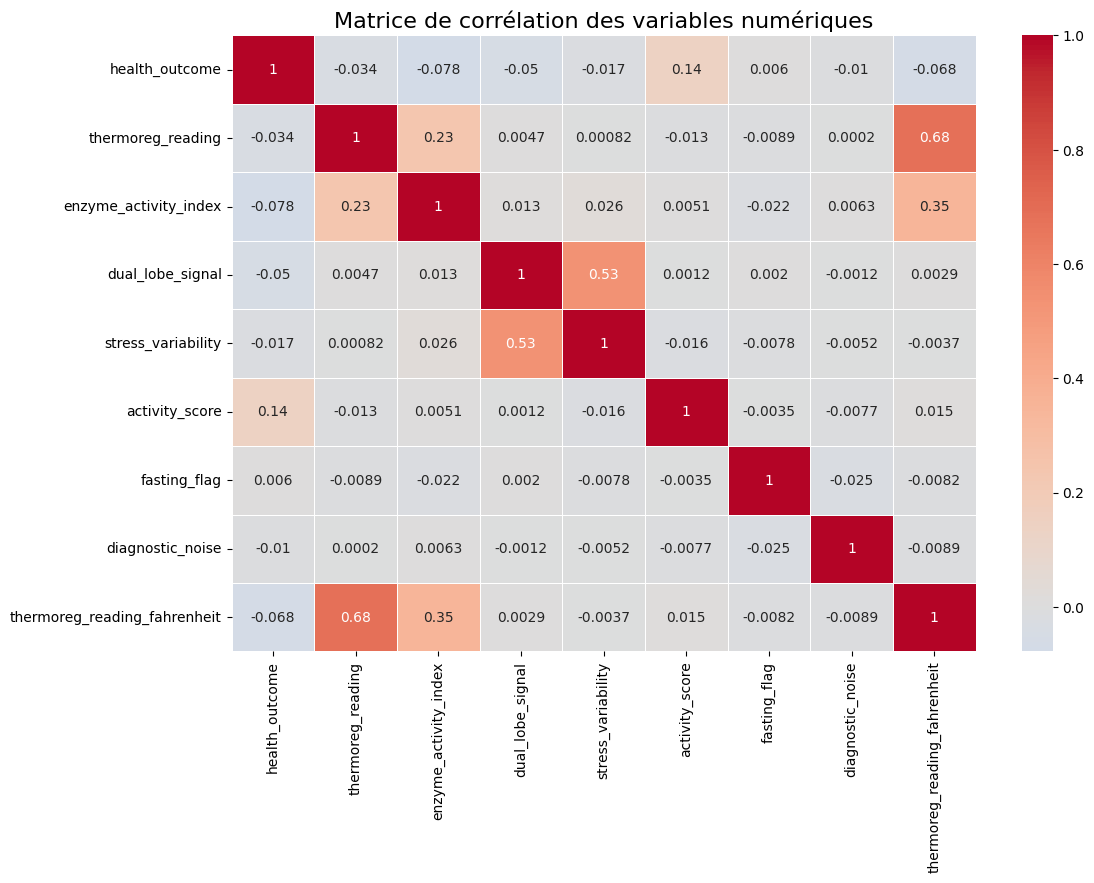

In [186]:
df_num = df[num_col].drop(columns=['ingest_marker'])

corr_matrix = df_num.corr(method="pearson")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.show()

Il y a une très grande correlation entre thermoreg_reading et thermoreg_reading_fahrenheit. On voit que c'est sûrement la même température mais convertie de celsius à fahrenheit donc on va en supprimer une (thermoreg_reading_fahrenheit)

In [187]:
to_drop = ['record_id','station_code','ingest_marker','thermoreg_reading_fahrenheit']
cat_col.remove('record_id')
cat_col.remove('station_code')
num_col.remove('ingest_marker')
num_col.remove('thermoreg_reading_fahrenheit')

print(f"Liste des attributs à supprimer: {to_drop}\n\n")
df.drop(columns=to_drop, inplace=True)
df.head()


Liste des attributs à supprimer: ['record_id', 'station_code', 'ingest_marker', 'thermoreg_reading_fahrenheit']




,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,calibration_tag,diagnostic_noise
0,52.6,97.0,3.6,-3.5,C2,2.0,0.0,1,A,0.482088
1,41.8,105.0,3.4,10.5,C1,2.0,0.0,0,A,NaN
2,56.2,126.0,5.5,9.6,C2,5.0,0.0,0,A,-0.747352
3,57.7,106.0,-4.1,-4.0,C1,4.0,0.0,1,A,0.570478
4,34.5,73.0,2.3,0.3,C4,5.0,1.0,1,A,-0.310844


5. **Caractériser les distributions**

- Pour chaque attribut numérique, fournir une caractérisation détaillée de la distribution de ses valeurs.
- Évaluer si la distribution présente une normalité ou une asymétrie.
- Déterminer si elle est unimodale ou multimodale.
- Identifier la présence de tout outlier.
- Justifier vos réponses.
- Créer des histogrammes pour soutenir visuellement vos conclusions.

In [188]:
# Cellule de code
df_num = df[num_col]
df_num.head()

,health_outcome,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,activity_score,fasting_flag,diagnostic_noise
0,1,52.6,97.0,3.6,-3.5,2.0,0.0,0.482088
1,0,41.8,105.0,3.4,10.5,2.0,0.0,NaN
2,0,56.2,126.0,5.5,9.6,5.0,0.0,-0.747352
3,1,57.7,106.0,-4.1,-4.0,4.0,0.0,0.570478
4,1,34.5,73.0,2.3,0.3,5.0,1.0,-0.310844


In [189]:
df_num.describe()

for elem in df_num.describe():

  print(f"------------------------{elem}------------------------\n")
  print(f"La moyenne est {df_num[elem].mean()}")
  print(f"La médiane est {df_num[elem].median()}")
  print(f"La variance est {df_num[elem].var()}")
  print(f"La écart type est {df_num[elem].std()}")
  print(f"La valeur minimale est {df_num[elem].min()}")
  print(f"La valeur maximale est {df_num[elem].max()}\n\n\n")

------------------------health_outcome------------------------

La moyenne est 0.4998
La médiane est 0.0
La variance est 0.2500499699939988
La écart type est 0.5000499674972481
La valeur minimale est 0
La valeur maximale est 1



------------------------thermoreg_reading------------------------

La moyenne est 49.48133671069154
La médiane est 49.900000000000006
La variance est 135.18174679774805
La écart type est 11.6267685449461
La valeur minimale est -79.31867350217316
La valeur maximale est 138.81867350217317



------------------------enzyme_activity_index------------------------

La moyenne est 103.43628438105499
La médiane est 101.0
La variance est 1506.4242844600667
La écart type est 38.812682005500044
La valeur minimale est 0.0
La valeur maximale est 349.9939676063846



------------------------dual_lobe_signal------------------------

La moyenne est 2.007716568544996
La médiane est 2.5
La variance est 8.991210683897878
La écart type est 2.9985347561597275
La valeur minimale es

Examinons la distribution de chque attribut numérique à l'aide d'histogrammes






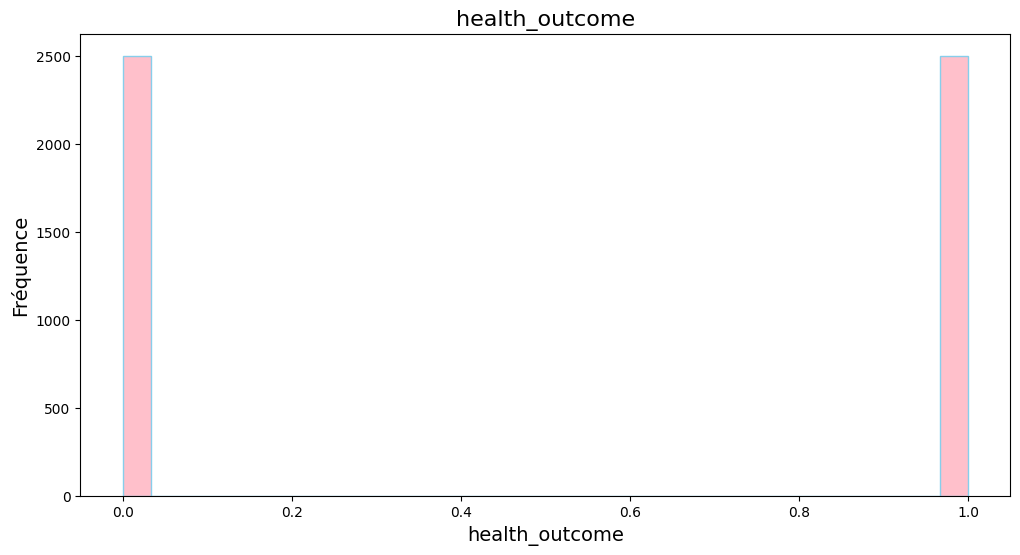

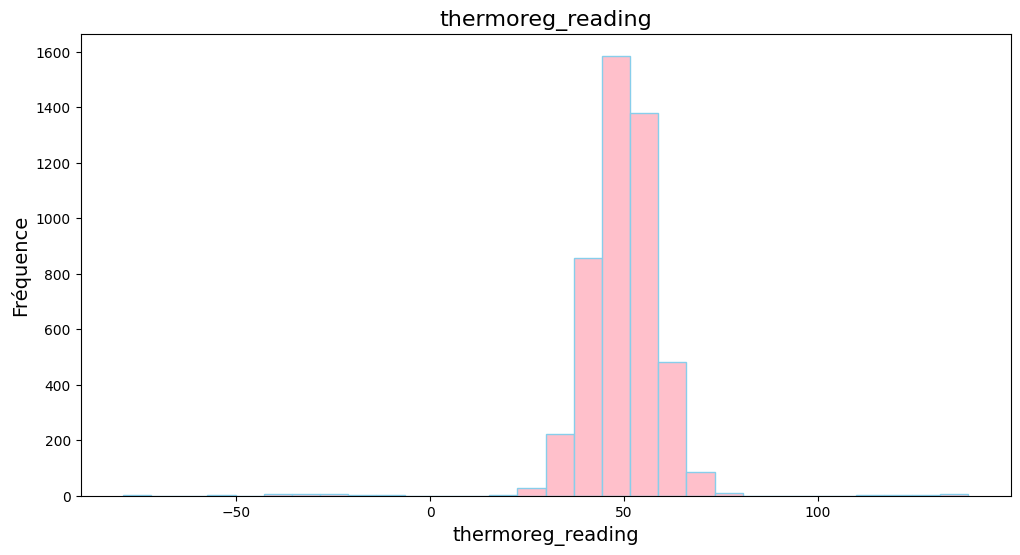

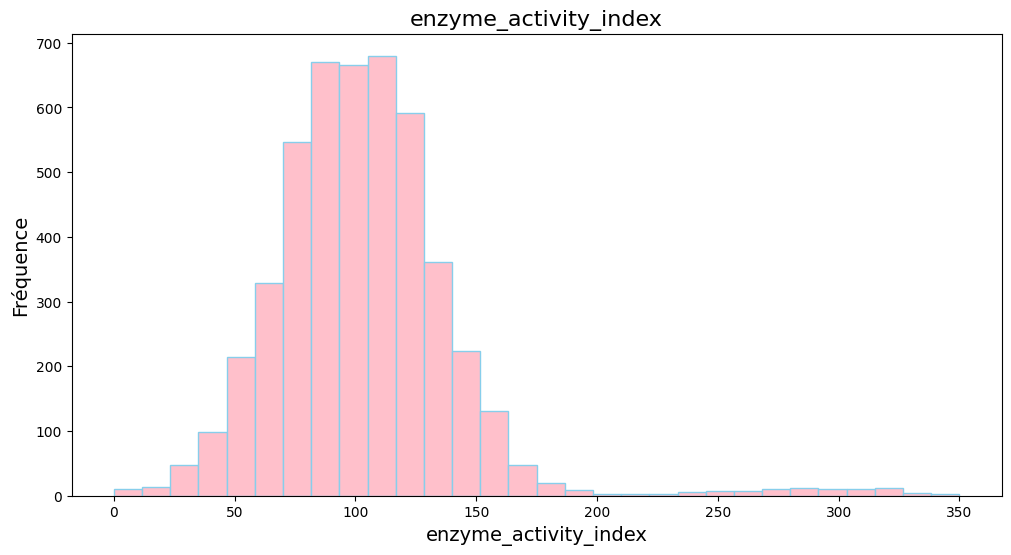

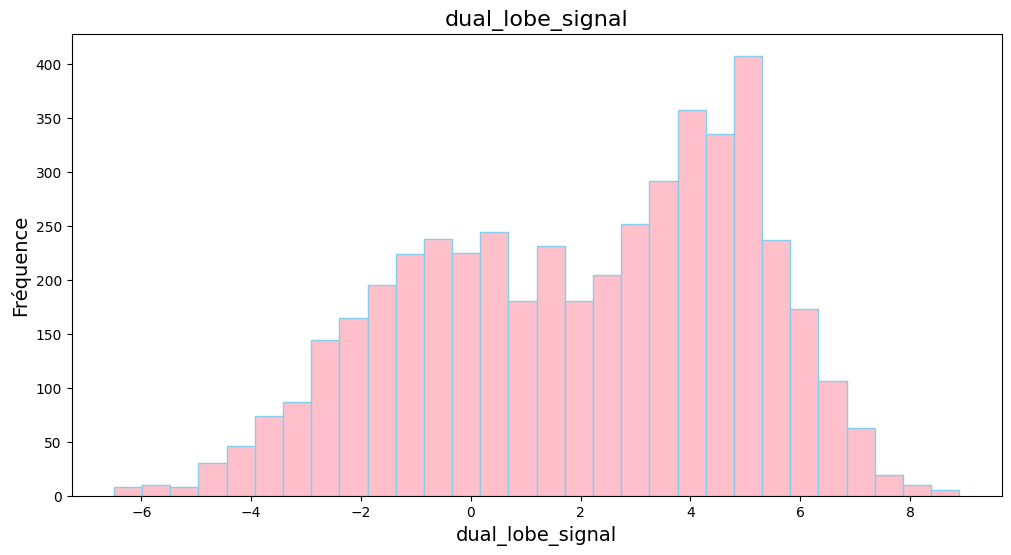

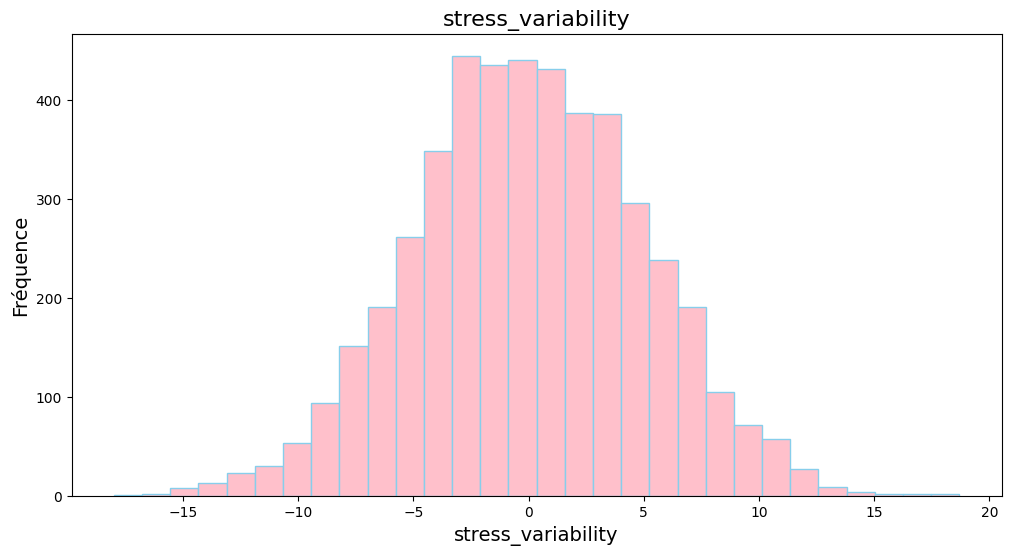

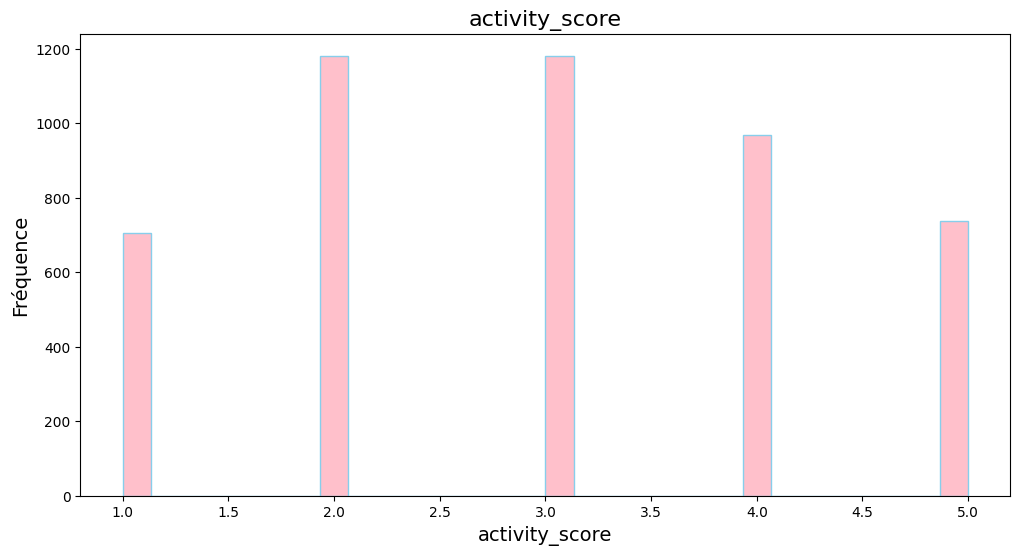

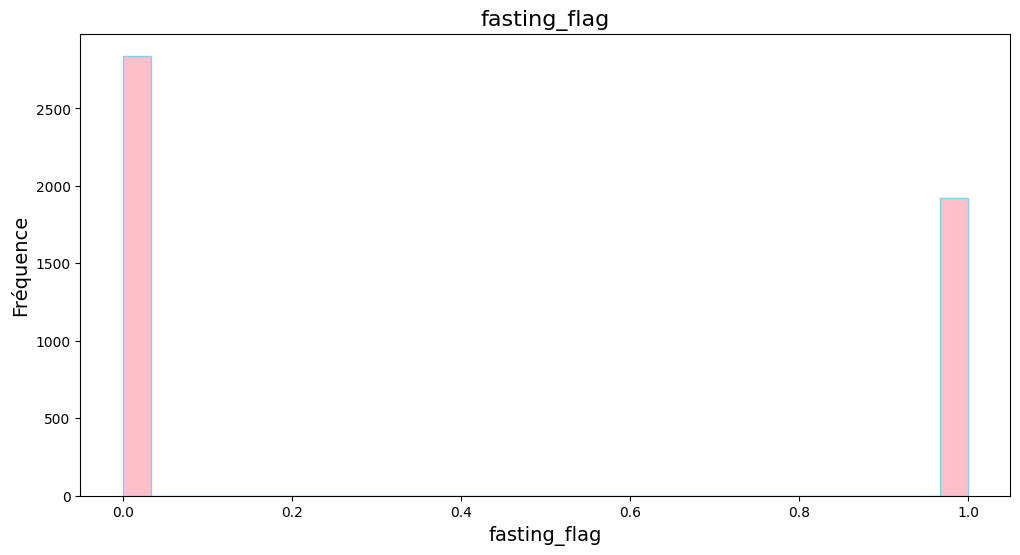

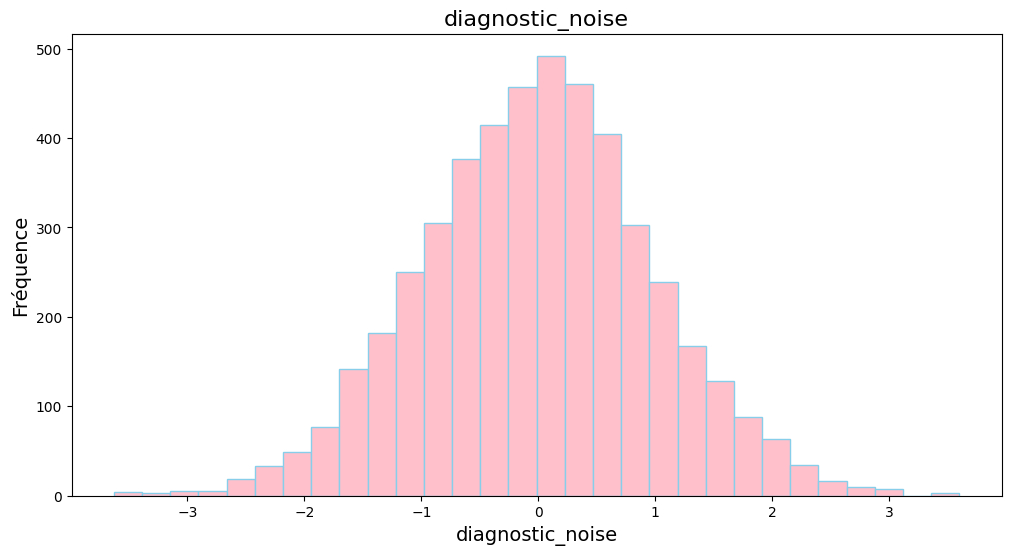

In [190]:
print("Examinons la distribution de chque attribut numérique à l'aide d'histogrammes\n\n\n\n")
for col in num_col:
    plt.figure(figsize=(12, 6))
    df[col].dropna().plot(kind='hist', bins=30, color='pink', edgecolor='skyblue')
    plt.title(col, fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Fréquence', fontsize=14)
    plt.show()


### Observation
En se basant visuellement sur les graphiques obtenus, voici ce que nous remarquons: 
- thermoreg_reading : distribution quasi normale, unimodale, asymétrique (skewed à droite).

- enzyme_activity_index : distribution quasi normale, unimodale, asymétrique (skewed à gauche).

- dual_lobe_signal : distribution bimodale (présence de deux pics distincts), symétrique.

- stress_variability : distribution normale, unimodale, relativement symétrique.

- activity_score : distribution discrète multimodale. On voit qu'elle a une distribution croissante respectivement 2,3,4,5 et 1.

- fasting_flag :  distribution de Bernoulli, 0 est majoritaire et 1 minoritaire

- diagnostic_noise : distribution normale, unimodale.

- health_outcome : distribution de Bernouilli, l'ériquette est uniformément distribuée

### Outliers 
Nous allons utliser IQR pour calculer et afficher les outliers et des boxplots pour vérifier nos résultats visuellement

------------------------health_outcome------------------------

Q1 = 0.0
Q3 = 1.0
IQR = 1.0
Borne inférieure = -1.5
Borne supérieure = 2.5
Outliers détectés :
Aucun outlier


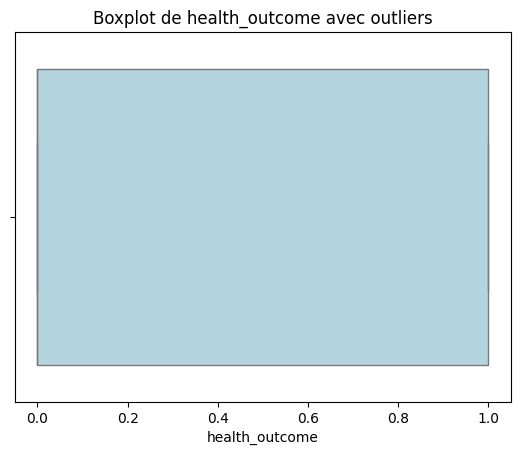

------------------------thermoreg_reading------------------------

Q1 = 44.400000000000006
Q3 = 54.900000000000006
IQR = 10.5
Borne inférieure = 28.650000000000006
Borne supérieure = 70.65
Outliers détectés :
96


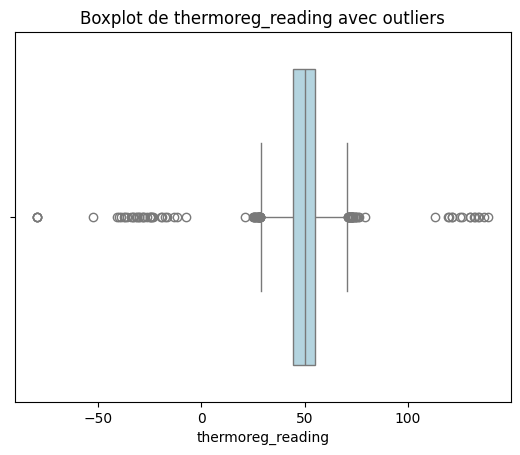

------------------------enzyme_activity_index------------------------

Q1 = 80.0
Q3 = 121.0
IQR = 41.0
Borne inférieure = 18.5
Borne supérieure = 182.5
Outliers détectés :
119


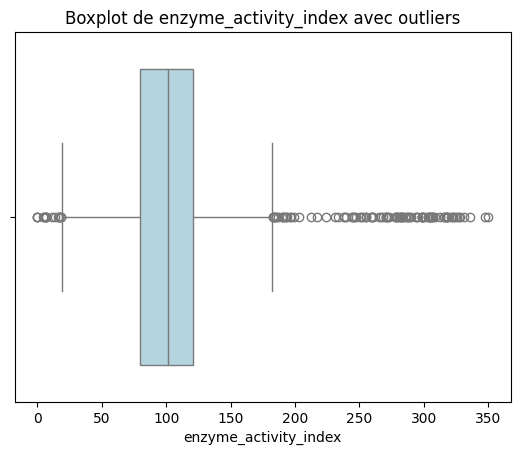

------------------------dual_lobe_signal------------------------

Q1 = -0.4
Q3 = 4.5
IQR = 4.9
Borne inférieure = -7.750000000000001
Borne supérieure = 11.850000000000001
Outliers détectés :
Aucun outlier


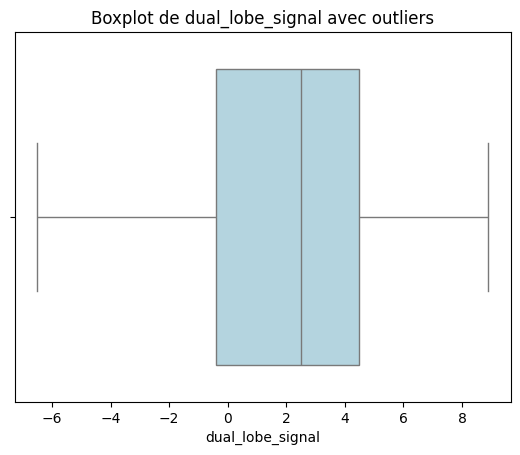

------------------------stress_variability------------------------

Q1 = -3.3000000000000003
Q3 = 3.5
IQR = 6.800000000000001
Borne inférieure = -13.500000000000002
Borne supérieure = 13.700000000000001
Outliers détectés :
25


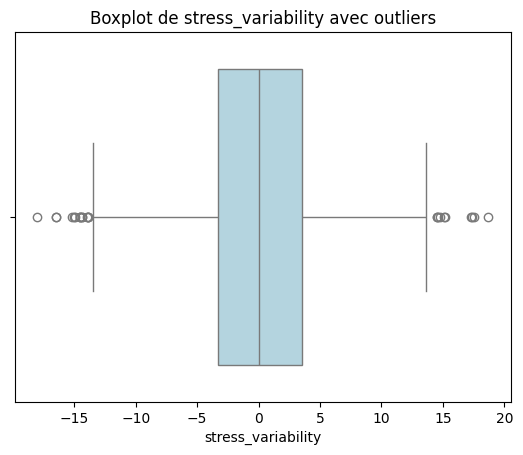

------------------------activity_score------------------------

Q1 = 2.0
Q3 = 4.0
IQR = 2.0
Borne inférieure = -1.0
Borne supérieure = 7.0
Outliers détectés :
Aucun outlier


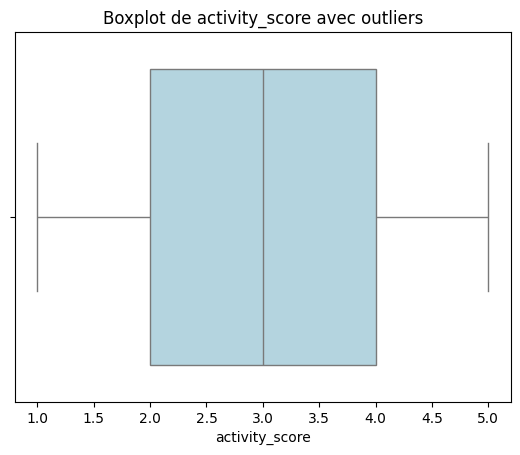

------------------------fasting_flag------------------------

Q1 = 0.0
Q3 = 1.0
IQR = 1.0
Borne inférieure = -1.5
Borne supérieure = 2.5
Outliers détectés :
Aucun outlier


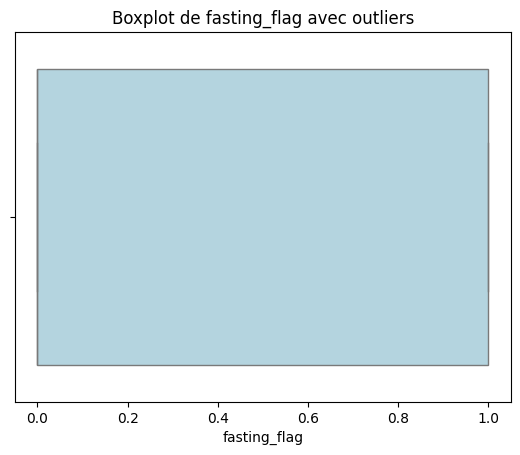

------------------------diagnostic_noise------------------------

Q1 = -0.6595949425277076
Q3 = 0.627104339675745
IQR = 1.2866992822034526
Borne inférieure = -2.5896438658328864
Borne supérieure = 2.5571532629809237
Outliers détectés :
50


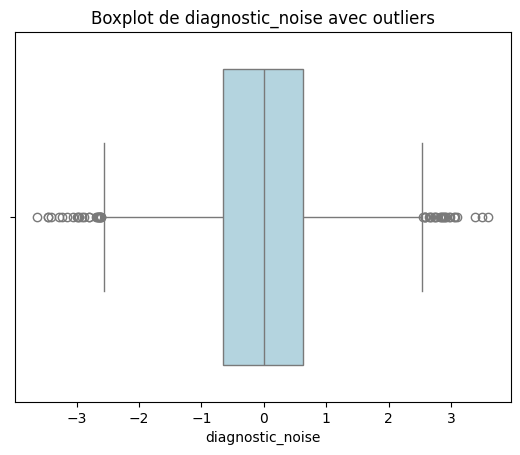

In [191]:
for elem in num_col:
    print(f"------------------------{elem}------------------------\n")
    # 1. Calculer Q1, Q3 et IQR
    Q1 = df[elem].quantile(0.25)
    Q3 = df[elem].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Définir bornes pour détecter outliers
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    # 3. Détecter les outliers
    outliers = df[(df[elem] < borne_inf) | (df[elem] > borne_sup)]

    print("Q1 =", Q1)
    print("Q3 =", Q3)
    print("IQR =", IQR)
    print("Borne inférieure =", borne_inf)
    print("Borne supérieure =", borne_sup)
    print("Outliers détectés :")
    print(len(outliers) if not outliers.empty else "Aucun outlier")

    # 4. Visualisation Boxplot
    sns.boxplot(x=df[elem], color='lightblue')
    plt.title(f"Boxplot de {elem} avec outliers")
    plt.show()

6. **Équilibre des classes**

- Rapporter les proportions cibles ; inclure un simple diagramme à barres.

In [192]:
for elem in cat_col:
    print(f"------------------------{elem}------------------------\n")
    values = df[elem].value_counts()
    print('Pourcentage de chaque classe\n')
    print(values / values.sum() * 100)
    print("\n\n")

------------------------habitat_zone------------------------

Pourcentage de chaque classe

habitat_zone
C1    34.682690
C2    25.089606
C3    20.535526
C4    11.574953
C5     8.117225
Name: count, dtype: float64



------------------------calibration_tag------------------------

Pourcentage de chaque classe

calibration_tag
A    97.901364
B     2.098636
Name: count, dtype: float64





------------------------habitat_zone------------------------



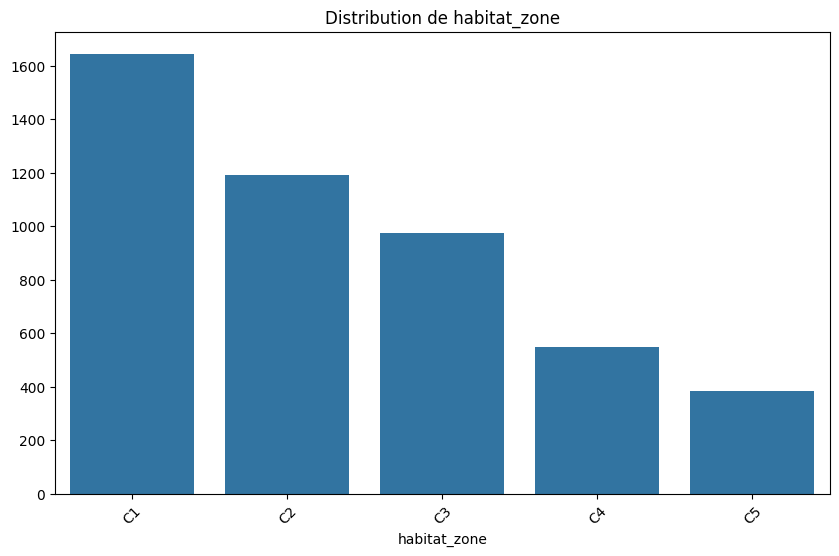

------------------------calibration_tag------------------------



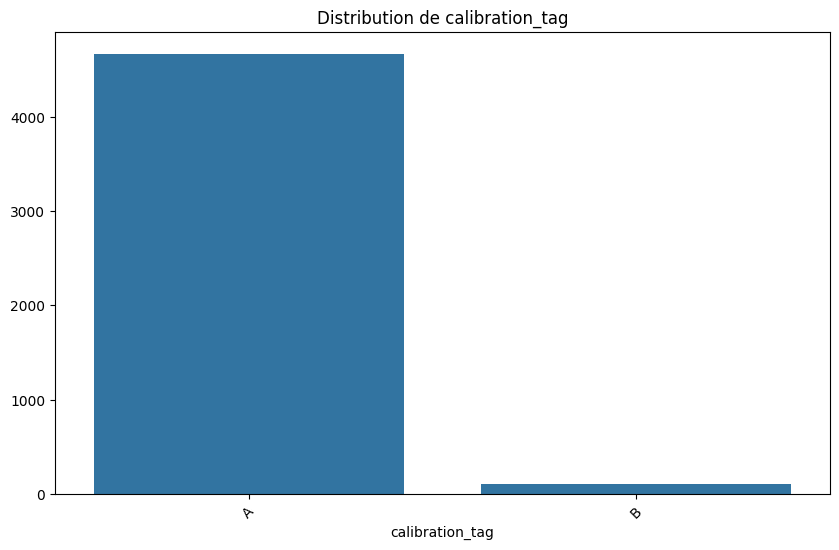

In [193]:
# Cellule de code
for elem in cat_col:
    print(f"------------------------{elem}------------------------\n")
    values = df[elem].value_counts()
    figure = plt.figure(figsize=(10, 6))
    sns.barplot(x=values.index, y=values.values)
    plt.title(f"Distribution de {elem}")
    plt.xticks(rotation=45)
    plt.show()


- habita_zone: On remque une distribution croissante des classes avec les classes les plus représentét respectivement C1, C2, C3, C4 et C5
- calibration_tag est très fortement débalancé avec la classe A qui écrase litéralement la classe B.

7. **Sauvegarder les données nettoyées**

- Conserver les attributs principaux plus `health_outcome`.
- Assurer les types de données corrects (numérique/ordinal/binaire).
- Sauvegarder sous `alien_pet_health_cleaned.csv`.

In [194]:
# Cellule de code
print(df.dtypes)
df.to_csv('alien_pet_health_cleaned.csv', index=False)

thermoreg_reading        float64
enzyme_activity_index    float64
dual_lobe_signal         float64
stress_variability       float64
habitat_zone              object
activity_score           float64
fasting_flag             float64
health_outcome             int64
calibration_tag           object
diagnostic_noise         float64
dtype: object


# Références
- Numpy.nan https://numpy.org/doc/stable/reference/constants.html#numpy.nan
- Pandas https://pandas.pydata.org/
- Matplotlib https://matplotlib.org/
- Seaborn https://seaborn.pydata.org/

# Ressources

Si vous utilisez l'assistance par IA, il est essentiel de documenter minutieusement toutes les interactions. Votre rapport doit spécifier les outils et leurs versions, accompagnés d'une transcription complète de ces interactions. La plupart des plateformes d'IA enregistrent automatiquement les conversations, il est donc conseillé de démarrer une nouvelle conversation spécifiquement pour le devoir et d'utiliser systématiquement ce fil tout au long de votre travail. Assurez-vous que cette conversation reste exclusivement centrée sur le devoir. Incluez la transcription de cette conversation.